In [1]:
import pandas as pd
import geopandas as gpd
import json
import os
from shapely.geometry import Point

In [2]:
data_locations = {"2016-Q3": "https://opendata.arcgis.com/datasets/a7e77931d33e40d089f2f22a751a38a4_0.geojson",
                  "2016-Q4": "https://opendata.arcgis.com/datasets/674e3757160f4901a11cc56c2386929d_0.geojson",
                  "2017-Q1": "https://opendata.arcgis.com/datasets/699eedf6140943e6b7fbea068a160a4c_0.geojson",
                  "2017-Q2": "https://opendata.arcgis.com/datasets/f97fbada01e140e8ae9b1a80b85e23dc_0.geojson",
                  "2017-Q3": "https://opendata.arcgis.com/datasets/dcb37441456448d1b7459b4ed4d3dc07_0.geojson",
                  "2017-Q4": "https://opendata.arcgis.com/datasets/9fe1b43232194e43acfdde66fc90aca0_0.geojson",
                  "2018-Q1": "https://opendata.arcgis.com/datasets/a2e613feac92476f82c6f76acc46dcce_0.geojson",
                  "2018-Q2": "https://opendata.arcgis.com/datasets/fe700d1cd7864b60be391667e862f672_0.geojson",
                  "2018-Q3": "https://opendata.arcgis.com/datasets/cd5f2baea423435488c3c30b3866ac5e_0.geojson"}

In [3]:
data = {}
for key, value in data_locations.items():
    data[key] = gpd.read_file(value)
    cval = list(data[key].columns.values)
    print(key, cval)

2016-Q3 ['OBJECTID_1', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlley', 'GlobalID', 'SegmentID', 'CS_RoundScore', 'CD', 'SanDist', 'IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']
2016-Q4 ['OBJECTID_1', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlley', 'GlobalID', 'SegmentID', 'CS_RoundScore', 'CD', 'SanDist', 'IllegalSeg', 'BulkySegSc', 'LLitterSeg', 'WdsSegSc', 'Shape__Length', 'Length', 'geometry']
2017-Q1 ['OBJECTID_1', 'OBJECTID', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'Code', 'GattedAlle', 'SegmentID', 'CS_RoundSc', 'CD', 'BulkyScore', 'LLScore', 'WdsScore', 'IDScore', 'Shape__Len', 'Shape__Length', 'geometry']
2017-Q2 ['FID', 'OBJECTID', 'FullName', 'LAPD_Grid', 'MIN_From_L', 'SegmentID', 'Segment_Sc', 'CS_RoundSc', 'BIScore', 'IDScore', 'LLScore', 'WdsScore', 'CD', 'Shape_Leng', 'Shape_Le_1', 'GattedAlle', 'Shape__Length', 'GlobalID', 'geometry']
2017-Q3 ['OBJECTID', 'StreetName', 'GridID', 'AddressRange', 'GattedAlley', 'SegmentID', 'C

In [4]:
data['2017-Q4'].head()

,OBJECTID_1,FullName,LAPD_Grid,MIN_From_L,SegmentID,CS_RoundScore,BIScore,IDScore,LLScore,WdsScore,CD_txt,Shape__Length,geometry
0,1001,3rd Ave,1413,200.0,2350,2,1.0,1.0,2.0,1.0,11,545.756075,"LINESTRING (-118.47762 33.99857, -118.47607 33..."
1,1002,3rd Ave,2041,900.0,2351,1,1.0,1.0,1.0,1.0,04,713.883686,"LINESTRING (-118.31651 34.05585, -118.31651 34..."
2,1003,3rd Ave,2042,800.0,2352,1,1.0,1.0,1.0,1.0,04,298.562282,"LINESTRING (-118.31652 34.05807, -118.31651 34..."
3,1004,3rd Helena Dr,825,12300.0,2353,1,1.0,1.0,1.0,1.0,11,83.534647,"LINESTRING (-118.47814 34.05258, -118.47887 34..."
4,1005,4th Anita Dr,825,100.0,2356,1,1.0,1.0,1.0,1.0,11,71.283215,"LINESTRING (-118.48295 34.05528, -118.48355 34..."


In [5]:
Q32016 = data["2016-Q3"].loc[:, ['SegmentID', 'CS_RoundScore','IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']]
Q32016.rename(columns={'CS_RoundScore': 'CSRound', 'IllegalSeg': 'IDScore', 'BulkySegSc': 'BulkyScore', 'WdsSegSc': 'WeedScore', 'LLitterSeg': 'LLScore'}, inplace = True)
Q32016.insert(0, "Year", "2016")
Q32016.insert(1, "Quarter", "Q3")
Q32016.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016,Q3,2300,1,1,1,1,1,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2016,Q3,2301,1,1,1,1,1,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2016,Q3,2302,1,1,1,1,1,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2016,Q3,2303,2,1,2,1,1,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2016,Q3,2304,1,1,1,1,1,"LINESTRING (-118.46766 33.98054, -118.46676 33..."


In [6]:
Q42016 = data["2016-Q4"].loc[:, ['SegmentID', 'CS_RoundScore','IllegalSeg', 'BulkySegSc', 'WdsSegSc', 'LLitterSeg', 'geometry']]
Q42016.rename(columns={'CS_RoundScore': 'CSRound', 'IllegalSeg': 'IDScore', 'BulkySegSc': 'BulkyScore', 'WdsSegSc': 'WeedScore', 'LLitterSeg': 'LLScore'}, inplace = True)
Q42016.insert(0, "Year", "2016")
Q42016.insert(1, "Quarter", "Q4")
Q42016.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016,Q4,2300,1,1,1,1,1,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2016,Q4,2301,1,1,1,1,1,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2016,Q4,2302,1,1,1,1,1,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2016,Q4,2303,1,1,1,1,1,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2016,Q4,2304,1,1,1,1,1,"LINESTRING (-118.46766 33.98054, -118.46676 33..."


In [7]:
Q12017 = data["2017-Q1"].loc[:, ['SegmentID', 'CS_RoundSc','IDScore', 'BulkyScore', 'WdsScore', 'LLScore', 'geometry']]
Q12017.rename(columns={'CS_RoundSc': 'CSRound', 'WdsScore': 'WeedScore'}, inplace = True)
Q12017.insert(0, "Year", "2017")
Q12017.insert(1, "Quarter", "Q1")
Q12017.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017,Q1,3282,1,1,1,1,1,"LINESTRING (-118.48147 34.19245, -118.48206 34..."
1,2017,Q1,3283,1,1,1,1,1,"LINESTRING (-118.47721 34.19281, -118.47819 34..."
2,2017,Q1,3284,1,1,1,1,1,"LINESTRING (-118.47608 34.19295, -118.47641 34..."
3,2017,Q1,3285,1,1,1,1,1,"LINESTRING (-118.39651 34.19212, -118.39760 34..."
4,2017,Q1,3286,1,1,1,1,1,"LINESTRING (-118.40941 34.19240, -118.41192 34..."


In [8]:
Q22017 = data["2017-Q2"].loc[:, ['SegmentID', 'CS_RoundSc','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q22017.rename(columns={'CS_RoundSc': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q22017.insert(0, "Year", "2017")
Q22017.insert(1, "Quarter", "Q2")
Q22017.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017,Q2,1,1,1,1,1,1,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2017,Q2,1470,1,1,1,1,1,"LINESTRING (-118.47349 33.99355, -118.47313 33..."
2,2017,Q2,2,1,1,1,1,1,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
3,2017,Q2,1471,1,1,1,1,1,"LINESTRING (-118.47344 33.99662, -118.47355 33..."
4,2017,Q2,3,1,1,1,1,1,"LINESTRING (-118.23920 34.05531, -118.23919 34..."


In [9]:
Q32017 = data["2017-Q3"].loc[:, ['SegmentID', 'CSScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q32017.rename(columns={'CSScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q32017.insert(0, "Year", "2017")
Q32017.insert(1, "Quarter", "Q3")
Q32017.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017,Q3,3364,1,1,1,1,1,"LINESTRING (-118.44787 34.02799, -118.44743 34..."
1,2017,Q3,3553,1,1,1,1,1,"LINESTRING (-118.55464 34.18223, -118.55457 34..."
2,2017,Q3,3554,2,1,2,1,1,"LINESTRING (-118.55420 34.17414, -118.55420 34..."
3,2017,Q3,3555,1,1,1,1,1,"LINESTRING (-118.55479 34.16829, -118.55479 34..."
4,2017,Q3,3556,1,1,1,1,1,"LINESTRING (-118.55453 34.25799, -118.55479 34..."


In [10]:
Q42017 = data["2017-Q4"].loc[:, ['SegmentID', 'CS_RoundScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q42017.rename(columns={'CS_RoundScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q42017.insert(0, "Year", "2017")
Q42017.insert(1, "Quarter", "Q4")
Q42017.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2017,Q4,2350,2,1.0,1.0,1.0,2.0,"LINESTRING (-118.47762 33.99857, -118.47607 33..."
1,2017,Q4,2351,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31651 34.05585, -118.31651 34..."
2,2017,Q4,2352,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31652 34.05807, -118.31651 34..."
3,2017,Q4,2353,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.47814 34.05258, -118.47887 34..."
4,2017,Q4,2356,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.48295 34.05528, -118.48355 34..."


In [11]:
Q12018 = data["2018-Q1"].loc[:, ['SegmentID', 'CSScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q12018.rename(columns={'CSScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q12018.insert(0, "Year", "2018")
Q12018.insert(1, "Quarter", "Q1")
Q12018.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018,Q1,2300,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2018,Q1,2301,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2018,Q1,2302,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2018,Q1,2303,1,1.0,2.0,1.0,1.0,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2018,Q1,2304,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46766 33.98054, -118.46676 33..."


In [12]:
Q22018 = data["2018-Q2"].loc[:, ['SegmentID', 'CS_RoundSc','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q22018.rename(columns={'CS_RoundSc': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q22018.insert(0, "Year", "2018")
Q22018.insert(1, "Quarter", "Q2")
Q22018.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018,Q2,4442,1,1,1,1,1,"LINESTRING (-118.42461 34.01298, -118.42462 34..."
1,2018,Q2,4443,1,1,1,1,1,"LINESTRING (-118.42302 34.00942, -118.42171 34..."
2,2018,Q2,4444,1,1,1,1,1,"LINESTRING (-118.41022 33.99848, -118.40579 33..."
3,2018,Q2,4445,1,1,2,1,1,"LINESTRING (-118.41576 34.00113, -118.41569 34..."
4,2018,Q2,4446,1,1,1,1,1,"LINESTRING (-118.48660 34.15402, -118.48650 34..."


In [13]:
Q32018 = data["2018-Q3"].loc[:, ['SegmentID', 'CS_RoundScore','IDScore', 'BIScore', 'WdsScore', 'LLScore', 'geometry']]
Q32018.rename(columns={'CS_RoundScore': 'CSRound', 'BIScore': 'BulkyScore', 'WdsScore': 'WeedScore'}, inplace = True)
Q32018.insert(0, "Year", "2018")
Q32018.insert(1, "Quarter", "Q3")
Q32018.head(5)

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2018,Q3,1,1,1,1,1,1,"LINESTRING (-118.24250 34.06576, -118.24252 34..."
1,2018,Q3,2,1,1,1,1,1,"LINESTRING (-118.24096 34.06751, -118.24111 34..."
2,2018,Q3,3,1,1,1,1,1,"LINESTRING (-118.23920 34.05531, -118.23919 34..."
3,2018,Q3,5,1,1,1,1,1,"LINESTRING (-118.23807 34.05659, -118.23748 34..."
4,2018,Q3,7,1,1,1,1,1,"LINESTRING (-118.24234 34.06571, -118.24250 34..."


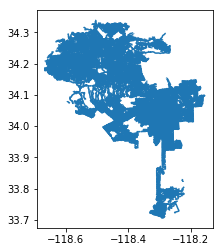

In [14]:
data["2018-Q3"].plot()

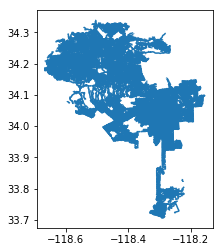

In [15]:
Q32018.plot()

In [16]:
#display(Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018, 
#        "pd.merge(Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018, on='Year-Quarter')")

In [17]:
ph_data = (Q32016, Q42016, Q12017, Q22017, Q32017, Q42017, Q12018, Q22018, Q32018)

In [18]:
ph_results = pd.concat(ph_data)

In [19]:
ph_results.head(10)  #382401 rows × 7 columns

,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,2016,Q3,2300,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,2016,Q3,2301,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2016,Q3,2302,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,2016,Q3,2303,2,1.0,2.0,1.0,1.0,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,2016,Q3,2304,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46766 33.98054, -118.46676 33..."
5,2016,Q3,2305,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46772 33.98011, -118.46743 33..."
6,2016,Q3,2306,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46721 33.98002, -118.46629 33..."
7,2016,Q3,2308,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.48265 34.05467, -118.48326 34..."
8,2016,Q3,2309,2,1.0,2.0,1.0,1.0,"LINESTRING (-118.31887 34.03595, -118.31887 34..."
9,2016,Q3,2310,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31874 34.02965, -118.31873 34..."


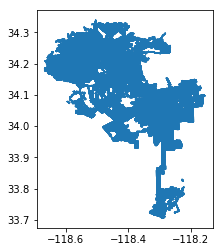

In [20]:
ph_results.plot()

In [21]:
# Checking for missing data
for column in ph_results:
    if ph_results[column].isnull().any():
        print('{0} has {1} null value'.format(column, ph_results[column].isnull().sum()))

IDScore has 10 null value
BulkyScore has 636 null value
WeedScore has 35 null value
LLScore has 218 null value


In [22]:
ph_results.describe()

,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore
count,382401.000000,382401.000000,382391.000000,381765.000000,382366.000000,382183.000000
mean,23866.243477,1.117332,1.016528,1.107564,1.019876,1.041669
std,13113.278226,0.347569,0.181058,0.345264,0.179770,0.235219
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12506.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23855.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,35246.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,46564.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [23]:
# Replace missing data with column mean 
phc = ph_results.fillna(ph_results.mean())
phc.describe()

,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore
count,382401.000000,382401.000000,382401.000000,382401.000000,382401.000000,382401.000000
mean,23866.243477,1.117332,1.016528,1.107564,1.019876,1.041669
std,13113.278226,0.347569,0.181056,0.344977,0.179761,0.235152
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12506.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23855.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,35246.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,46564.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [24]:
'''
# This was prior to addressing nulls

from geoalchemy2 import Geometry, WKTElement
srid = 4326
ph_results_serialize = ph_results.copy()
ph_results_serialize['geometry'] = ph_results.apply(
    lambda x: WKTElement(x.geometry.wkt, srid=srid), axis=1
)
'''

"from geoalchemy2 import Geometry, WKTElement\nsrid = 4326\nph_results_serialize = ph_results.copy()\nph_results_serialize['geometry'] = ph_results.apply(\n    lambda x: WKTElement(x.geometry.wkt, srid=srid), axis=1\n)"

In [25]:
from geoalchemy2 import Geometry, WKTElement
srid = 4326
ph_results_serialize = phc.copy()
ph_results_serialize['geometry'] = phc.apply(
    lambda x: WKTElement(x.geometry.wkt, srid=srid), axis=1
)

In [26]:
import sqlalchemy
import os
engine = sqlalchemy.create_engine(os.environ['POSTGRES_URI'])

In [27]:
engine.table_names(schema='public-health')

['cleanstat', '311-cases-homelessness', 'Burrows', 'Bait Traps']

In [28]:
ph_results_serialize.to_sql(
    "cleanstat",
    engine,
    schema="public-health",
    if_exists="replace",
    dtype={"geometry": Geometry("LINESTRING", srid=srid)}
)

In [31]:
import sqlalchemy
import sqlite3
engine = sqlalchemy.create_engine(os.environ['POSTGRES_URI'])
engine.table_names(schema="public-health")

['cleanstat', '311-cases-homelessness', 'Burrows', 'Bait Traps']

In [32]:
gdf = gpd.read_postgis('select * from "public-health".cleanstat', engine, geom_col='geometry')

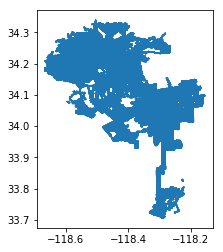

In [33]:
gdf.plot()

In [34]:
gdf.head(10)

,index,Year,Quarter,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore,geometry
0,0,2016,Q3,2300,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46862 33.98114, -118.46833 33..."
1,1,2016,Q3,2301,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46811 33.98106, -118.46722 33..."
2,2,2016,Q3,2302,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46817 33.98062, -118.46788 33..."
3,3,2016,Q3,2303,2,1.0,2.0,1.0,1.0,"LINESTRING (-118.46593 33.98208, -118.46560 33..."
4,4,2016,Q3,2304,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46766 33.98054, -118.46676 33..."
5,5,2016,Q3,2305,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46772 33.98011, -118.46743 33..."
6,6,2016,Q3,2306,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.46721 33.98002, -118.46629 33..."
7,7,2016,Q3,2308,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.48265 34.05467, -118.48326 34..."
8,8,2016,Q3,2309,2,1.0,2.0,1.0,1.0,"LINESTRING (-118.31887 34.03595, -118.31887 34..."
9,9,2016,Q3,2310,1,1.0,1.0,1.0,1.0,"LINESTRING (-118.31874 34.02965, -118.31873 34..."


In [35]:
gdf.describe()

,index,SegmentID,CSRound,IDScore,BulkyScore,WeedScore,LLScore
count,382401.000000,382401.000000,382401.000000,382401.000000,382401.000000,382401.000000,382401.000000
mean,21244.000000,23866.243477,1.117332,1.016528,1.107564,1.019876,1.041669
std,12265.533828,13113.278226,0.347569,0.181056,0.344977,0.179761,0.235152
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10622.000000,12506.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,21244.000000,23855.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,31866.000000,35246.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42488.000000,46564.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [36]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 382401 entries, 0 to 382400
Data columns (total 10 columns):
index         382401 non-null int64
Year          382401 non-null object
Quarter       382401 non-null object
SegmentID     382401 non-null int64
CSRound       382401 non-null int64
IDScore       382401 non-null float64
BulkyScore    382401 non-null float64
WeedScore     382401 non-null float64
LLScore       382401 non-null float64
geometry      382401 non-null geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 29.2+ MB
